# Pymaceuticals Inc.
---

### Analysis Summary

- This study focuses on the effectiveness of potential anti-cancer treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer, which were tested on 249 mice over the course of 45 days using Capomulin, Ramicane, Infubinol, and Ceftamin drug regimens.  The purpose of this study is to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.  The mice are comprised of 51% male and 49% female; however, no discernable difference between treatments based on the sex of the mouse. Of note, Capomulin and Ramicane are the only two treatments with observed timepoints over 200, according to the bar charts. 

 
- The tumor volume median revealed the following: Ramicane (40.67), Capomulin (41.55), Infubinol (51.82), and Ketapril (53.69); however, the boxplot graphic reveals Capomulin performed the best and had the lowest final tumor volume with Ramicane a close second. 

 
- A study of treatment for mouse l509 reveals a reduction in tumor size is followed by slight tumor growth, then a reduction in tumor size, according to the line chart. The overall Capomulin correlation between mouse weight and the average tumor volume is 0.84. 
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")  

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice_count = study_data_complete["Mouse ID"].nunique()
mice_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
# Previous step revealed duplicate for mouse g989.
duplicate_mouse_id = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989", :]
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
deduped_mice = clean_study_data_complete['Mouse ID'].nunique()
deduped_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_study_data_complete["Tumor Volume (mm3)"].groupby(clean_study_data_complete["Drug Regimen"]).mean()
median = clean_study_data_complete["Tumor Volume (mm3)"].groupby(clean_study_data_complete["Drug Regimen"]).median()
variance = clean_study_data_complete["Tumor Volume (mm3)"].groupby(clean_study_data_complete["Drug Regimen"]).var()
standard_dev = clean_study_data_complete["Tumor Volume (mm3)"].groupby(clean_study_data_complete["Drug Regimen"]).std()
sem = clean_study_data_complete["Tumor Volume (mm3)"].groupby(clean_study_data_complete["Drug Regimen"]).sem()


# Assemble the resulting series into a single summary DataFrame.
tumor_summary_stats = pd.DataFrame({"Mean Tumor Volume" : mean,
                                   "Median Tumor Volume" : median,
                                   "Tumor Volume Variance" : variance,
                                   "Tumor Volume Std. Dev." : standard_dev,
                                   "Tumor Volume Std. Err." : sem})
#Print the tumor summary statistics.
tumor_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_agg = clean_study_data_complete.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
tumor_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

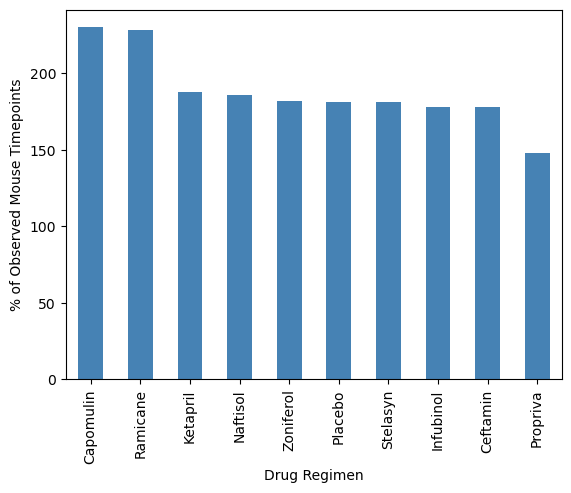

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_rows = clean_study_data_complete["Drug Regimen"].value_counts() 
plot_pandas = mice_rows.plot.bar(color="steelblue")
plt.xlabel("Drug Regimen")
plt.ylabel("% of Observed Mouse Timepoints")
plt.show()

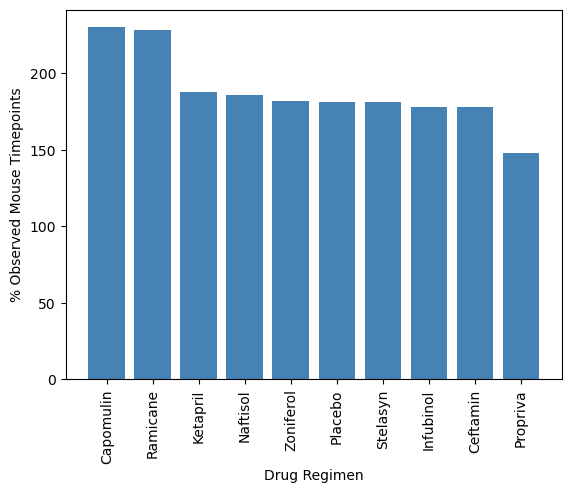

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_rows.index.values
y_axis = mice_rows.values
# This creates and center the pyplot bar plot
plt.bar(x_axis, y_axis, color="steelblue", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("% Observed Mouse Timepoints")
# This formats the x label vertically
plt.xticks(rotation="vertical")
plt.show()

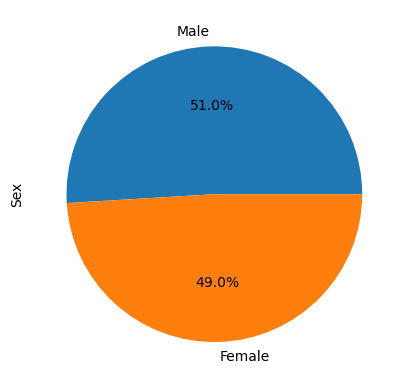

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice = clean_study_data_complete["Sex"].value_counts() 
gender_mice.plot.pie(autopct= "%1.1f%%") 
plt.show()

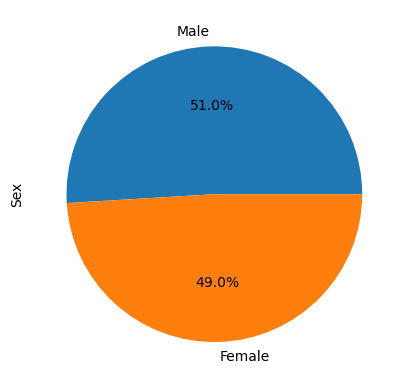

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = ["Male", "Female"]
# Calculates gender percentage 
gender_percent = gender_mice / gender_mice.sum() * 100
gender_size = ["gender_percent"]
plot = gender_mice.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin",:]
Ramicane = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Ramicane", :]
Infubinol = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Infubinol",:]
Ceftamin = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse and treatment
Capomulin_last = Capomulin.groupby("Mouse ID").max()["Timepoint"]
Capomulin_timepoint = pd.DataFrame(Capomulin_last)

Ramicane_last = Ramicane.groupby("Mouse ID").max()["Timepoint"]
Ramicane_timepoint = pd.DataFrame(Ramicane_last)

Infubinol_last = Infubinol.groupby("Mouse ID").max()["Timepoint"]
Infubinol_timepoint = pd.DataFrame(Infubinol_last)

Ceftamin_last = Ceftamin.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_timepoint = pd.DataFrame(Ceftamin_last)

# Merge this group df with the original DataFrame to get the last/greatest timepoint for each mouse
Capomulin_merge = pd.merge(Capomulin_timepoint, clean_study_data_complete, on=("Mouse ID", "Timepoint"), how="left")
Ramicane_merge = pd.merge(Ramicane_timepoint, clean_study_data_complete, on=("Mouse ID", "Timepoint"), how="left")
Infubinol_merge = pd.merge(Infubinol_timepoint, clean_study_data_complete, on=("Mouse ID", "Timepoint"), how="left")
Ceftamin_merge = pd.merge(Ceftamin_timepoint, clean_study_data_complete, on=("Mouse ID", "Timepoint"), how="left")

# This finds the final tumor volume for each mouse by merging with last timepoint and mice data
Capomulin_growth = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_growth = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_growth = Infubinol_merge["Tumor Volume (mm3)"]
Ceftamin_growth = Ceftamin_merge["Tumor Volume (mm3)"]

# Last (greatest) timepoint for each mouse
drug_treatment = clean_study_data_complete.groupby("Mouse ID").max()["Timepoint"]
timepoint_last = pd.DataFrame(drug_treatment)

# Merge this group df with the original DataFrame to get the last/greatest timepoint for each mouse,
tumor_volume = pd.merge(timepoint_last, clean_study_data_complete, on = ["Mouse ID", "Timepoint"], how='left')
Ceftamin_growth.head()

0    62.999356
1    45.000000
2    56.057749
3    55.742829
4    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create a combined drugs list
drug_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#drugs_combined_list = clean_study_data_complete[clean_study_data_complete["Drug Regimen"].isin(drugs)]
#drugs_combined_list.head(15)

# Create empty list to fill with tumor vol data (for plotting)

capomulin_tumor_vol = []
ramicane_tumor_vol = []
infubinol_tumor_vol = []
ceftamin_tumor_vol = []

# This loops through each of the drugs for the tumor volume
for i in range(len(tumor_volume)-1):
    if tumor_volume.loc[i, "Drug Regimen"] == "Capomulin":
        capomulin_tumor_vol.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume.loc[i, "Drug Regimen"] == "Ramicane":
        ramicane_tumor_vol.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume.loc[i, "Drug Regimen"] == "Infubinol":
        infubinol_tumor_vol.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume.loc[i, "Drug Regimen"] == "Ceftamin":
        ceftamin_tumor_vol.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])
        
# This places the drug treatments and tumor volumes into a list
final_tumor_vol = [capomulin_tumor_vol, ramicane_tumor_vol, infubinol_tumor_vol, ceftamin_tumor_vol]
 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outliers = []

for i in range(len(final_tumor_vol)):
    quartile = pd.Series(final_tumor_vol[i]).quantile([.25,.50,.75])
    lower_quartile = quartile[0.25]
    upper_quartile = quartile[0.75]
    IQR = upper_quartile - lower_quartile
    print(f"\n{drug_treatment[i]}:")
    
    # Determine outliers using upper and lower bounds
    # Print the possible outliers for each of the drugs
    lower_bound = lower_quartile - (1.5*IQR)
    upper_bound = upper_quartile - (1.5*IQR)
    print(f"{lower_bound} lower potential outliers.")
    print(f"{upper_bound} upper potential outliers.")
    
    
# Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin_growth = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_growth = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_growth = Infubinol_merge["Tumor Volume (mm3)"]
Ceftamin_growth = Ceftamin_merge["Tumor Volume (mm3)"]



Capomulin:
20.70456164999999 lower potential outliers.
28.486425109999995 upper potential outliers.

Ramicane:
17.912664470000003 lower potential outliers.
27.01120119 upper potential outliers.

Infubinol:
36.83290494999999 lower potential outliers.
48.310040109999996 upper potential outliers.

Ceftamin:
25.355449580000002 lower potential outliers.
40.93320176 upper potential outliers.


<function matplotlib.pyplot.show(close=None, block=None)>

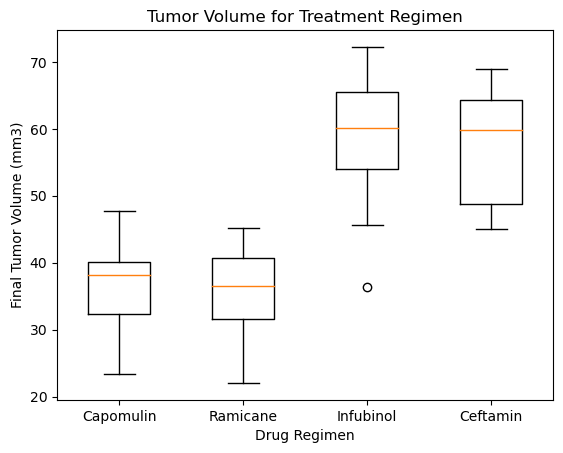

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_tumor_data = [Capomulin_growth, Ramicane_growth, Infubinol_growth, Ceftamin_growth]
box_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Orange_out=dict(makerfacecolor ='red', markersize=12)
figl, axl = plt.subplots()
axl.set_title("Tumor Volume for Treatment Regimen", fontsize = 12)
axl.set_xlabel("Drug Regimen")
axl.set_ylabel("Final Tumor Volume (mm3)")
axl.boxplot(box_tumor_data, labels=box_regimen, widths = 0.5,vert=True)
plt.show

## Line and Scatter Plots

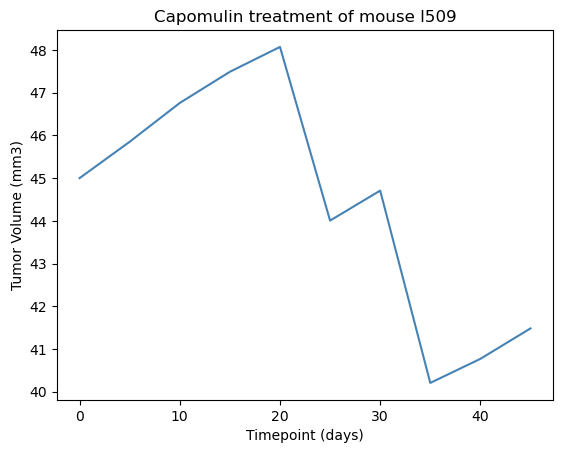

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume.loc[tumor_volume["Drug Regimen"] == "Capomulin"]
# Select Mouse ID l509
l509_treatment = clean_study_data_complete.loc[clean_study_data_complete["Mouse ID"] == "l509"]
plt.plot(l509_treatment["Timepoint"], l509_treatment["Tumor Volume (mm3)"], color = "steelblue")
plt.title("Capomulin treatment of mouse l509", fontsize = 12)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

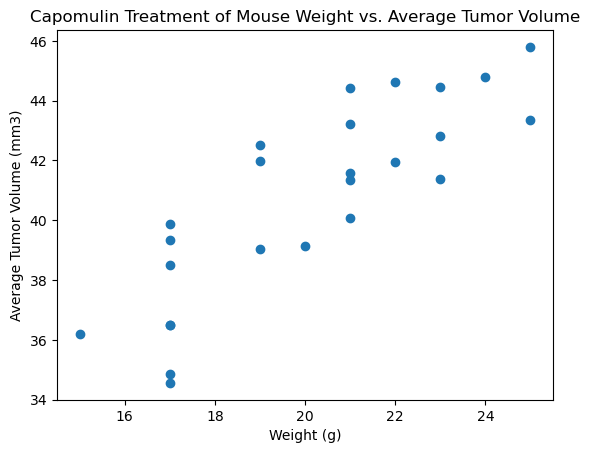

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_scatter = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
average_tumor = Capomulin_scatter["Tumor Volume (mm3)"].mean()
m_weight = Capomulin_scatter["Weight (g)"].unique()
plt.scatter(m_weight, average_tumor)
plt.title("Capomulin Treatment of Mouse Weight vs. Average Tumor Volume", fontsize = 12)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


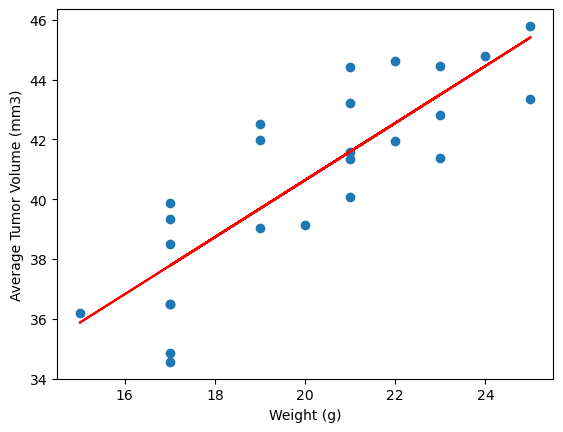

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
m_weight = m_weight.astype(float)
correlation = st.pearsonr(m_weight, average_tumor)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(m_weight, average_tumor)
regress_v = m_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(m_weight, average_tumor)
plt.plot(m_weight,regress_v,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()